In [24]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [25]:
# Create a file path
filepath = "Netflix TV Shows and Movies.csv"

# Read in the data. 
df = pd.read_csv(filepath)

df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [26]:
df.tail()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
5278,5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,tt14412240,5.8,26.0
5279,5279,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,tt13857480,6.9,39.0
5280,5280,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,tt14620732,6.5,32.0
5281,5281,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,tt10168094,6.2,9.0
5282,5282,ts271048,Mighty Little Bheem: Kite Festival,SHOW,"With winter behind them, Bheem and his townspe...",2021,NaN,0,tt13711094,8.8,16.0


In [27]:
df.info

<bound method DataFrame.info of       index         id                               title   type  \
0         0    tm84618                         Taxi Driver  MOVIE   
1         1   tm127384     Monty Python and the Holy Grail  MOVIE   
2         2    tm70993                       Life of Brian  MOVIE   
3         3   tm190788                        The Exorcist  MOVIE   
4         4    ts22164        Monty Python's Flying Circus   SHOW   
...     ...        ...                                 ...    ...   
5278   5278  tm1040816         Momshies! Your Soul is Mine  MOVIE   
5279   5279  tm1014599                           Fine Wine  MOVIE   
5280   5280  tm1045018                               Clash  MOVIE   
5281   5281  tm1098060                      Shadow Parties  MOVIE   
5282   5282   ts271048  Mighty Little Bheem: Kite Festival   SHOW   

                                            description  release_year  \
0     A mentally unstable Vietnam War veteran works ...          1

In [28]:
# Dropping nulls with no imbd votes
filtered_df = df.dropna()

In [29]:
selected_col = ["index", "title", "type", "description", "release_year", "age_certification", "imdb_score", "imdb_votes"]
clean_df = filtered_df[selected_col].copy()
clean_df.head()

,index,title,type,description,release_year,age_certification,imdb_score,imdb_votes
0,0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,8.3,795222.0
1,1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,8.2,530877.0
2,2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,8.0,392419.0
3,3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,8.1,391942.0
4,4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,8.8,72895.0


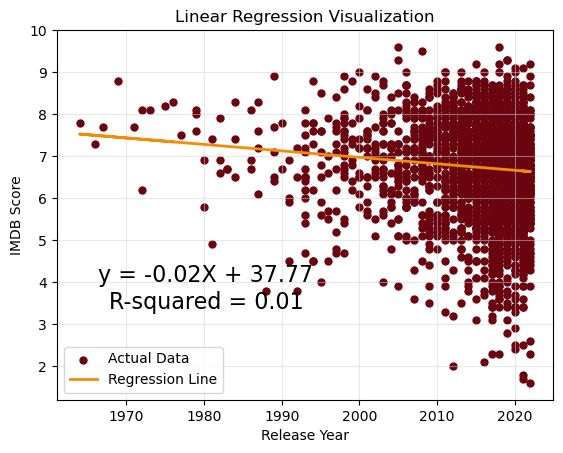

In [57]:
# with help from xpert

from sklearn.linear_model import LinearRegression


# Filter the data to include only imdb_votes <= 500000
filtered_df = clean_df[clean_df["release_year"] <= 500000]


# Generate some random data for demonstration
# plt.scatter(clean_df["release_year"], clean_df["imdb_score"])

X = clean_df["release_year"].values.reshape(-1, 1)
y = clean_df["imdb_score"].values.ravel()

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Calculate R-squared
r_squared = model.score(X, y)


# Make predictions
y_pred = model.predict(X)



# Plot the data points and the regression line
plt.scatter(clean_df["release_year"], clean_df["imdb_score"], color='#6a040f', label='Actual Data', s=25)
plt.plot(X, y_pred, color='#f48c06', linewidth=2, label='Regression Line')

# Add grid lines
plt.grid(True)
plt.grid(axis='both', alpha=0.5, color='lightgrey')

# Print the regression formula and R-squared on the chart
plt.text(0.3, 0.3, f'y = {model.coef_[0]:.2f}X + {model.intercept_:.2f}\nR-squared = {r_squared:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=16)


plt.ylabel('IMDB Score')
plt.xlabel('Release Year')
plt.title('Linear Regression Visualization')
plt.legend()
plt.show()

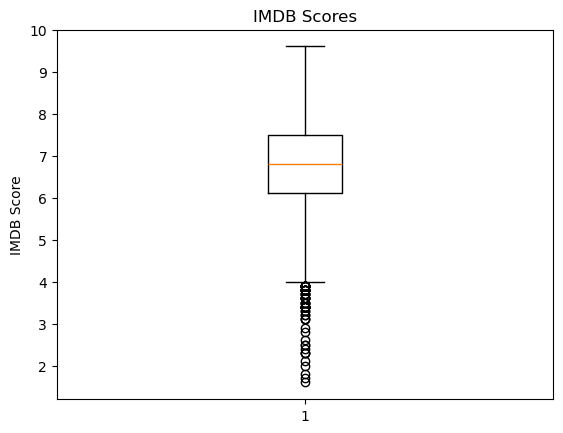

In [31]:
# Box plot for IMDb scores
plt.boxplot(clean_df["imdb_score"])
plt.title('IMDB Scores')
plt.ylabel('IMDB Score')
plt.show()

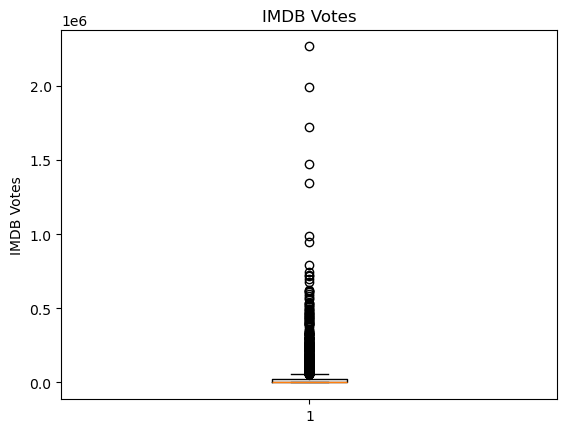

In [32]:
# Box plot for IMDb votes
plt.boxplot(clean_df["imdb_votes"])
plt.title('IMDB Votes')
plt.ylabel('IMDB Votes')
plt.show()

In [33]:
# Calculate z-scores for imdb_votes and imdb_score columns
z_scores_votes = (clean_df["imdb_votes"] - clean_df["imdb_votes"].mean()) / clean_df["imdb_votes"].std()
z_scores_score = (clean_df["imdb_score"] - clean_df["imdb_score"].mean()) / clean_df["imdb_score"].std()


In [34]:
# Generate random data for two groups
data1 = np.random.normal(loc=5, scale=2, size=100)
data2 = np.random.normal(loc=4.8, scale=2, size=120)

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(data1, data2)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 0.23199848692420444
P-Value: 0.8167568238544297


In [35]:
# Calculate z-scores for imdb_votes and imdb_score columns
z_scores_votes = (clean_df["release_year"] - clean_df["release_year"].mean()) / clean_df["release_year"].std()
z_scores_score = (clean_df["imdb_score"] - clean_df["imdb_score"].mean()) / clean_df["imdb_score"].std()


In [36]:
# Generate random data for two groups
data1 = np.random.normal(loc=5, scale=2, size=100)
data2 = np.random.normal(loc=4.8, scale=2, size=120)

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(data1, data2)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: -0.3301184333795064
P-Value: 0.7416274901319813
